**PREDICTING SLEEP EFFICIENCY USING RANDOM FOREST**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Sleep_Efficiency.csv')

In [ ]:
df['sex']=df['Gender'].apply(lambda X:1 if X=='Male' else 0)
df['smoking'] = df['Smoking status'].apply(lambda x:1 if x == 'Yes' else 0)
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,sex,smoking
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,0,1
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,1,1
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,0,0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,0,1
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1,0


In [ ]:
#EXTRACTING HOUR FROM DATE TIME COLUMNS
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%Y-%m-%d %H:%M:%S')
df['Wakeup time']=pd.to_datetime(df['Wakeup time'],format='%Y-%m-%d %H:%M:%S')

# Extracting just the hour
df['Bedhour'] = df['Bedtime'].dt.hour
df['Wakehour']=df['Wakeup time'].dt.hour

In [ ]:
#DROPPING UNWANTED COLUMNS
df.drop(['ID','Gender','Bedtime','Wakeup time','Smoking status'],axis='columns', inplace=True)
df.shape
df.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,sex,smoking,Bedhour,Wakehour
0,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,0,1,1,7
1,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,1,1,2,9
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,0,0,21,5
3,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0,1,2,8
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0,1,9


In [ ]:
#DATA CLEANING WITH MISSING VALUES
df.dropna(inplace=True)
df.shape

(388, 14)

<ipython-input-9-e01ebb2bc1f6>:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


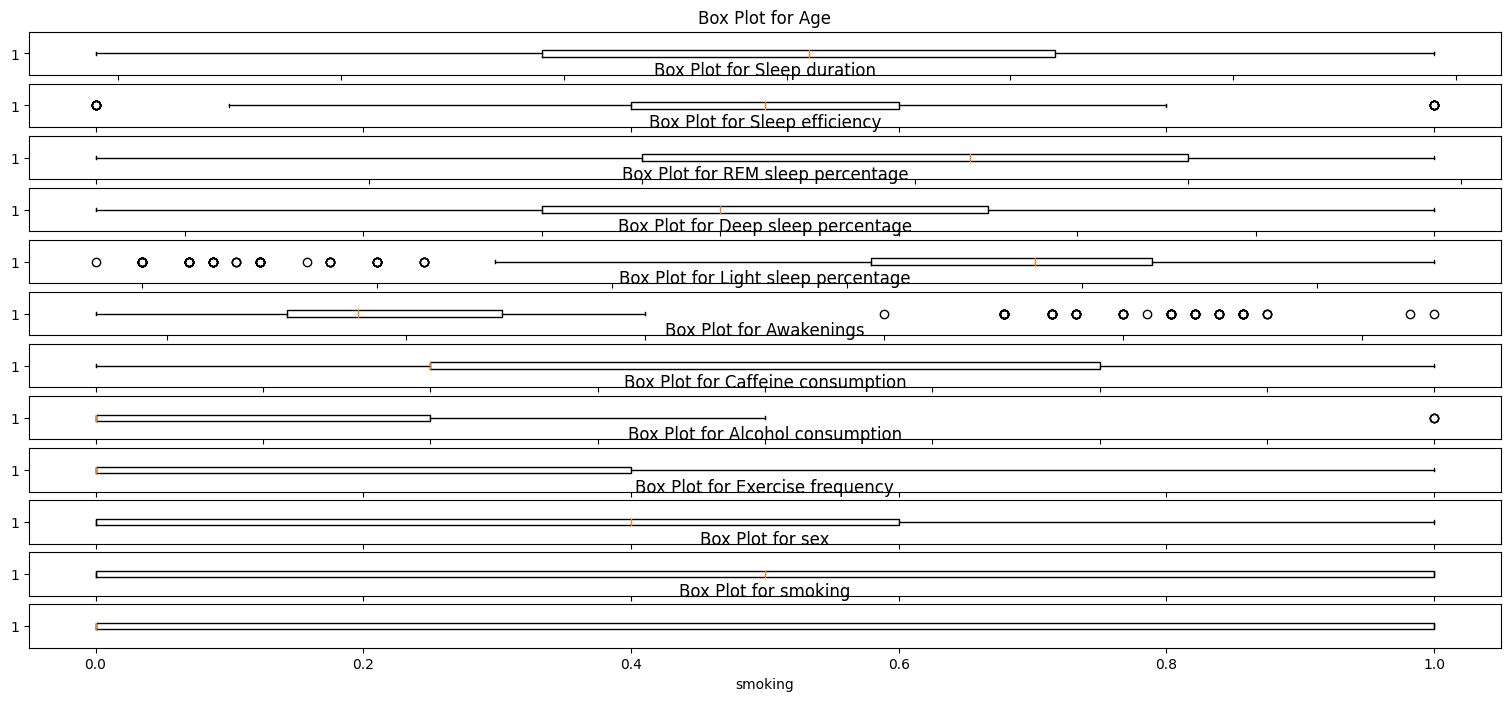

In [ ]:
#OUTLIER DETECTION
import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(19, 8))

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i+1)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
#IQR -interquartile range method for cleaning outliers
Q1 = df.quantile(0.2)
Q3 = df.quantile(0.8)
IQR = Q3 - Q1

print("The shape of the dataframe before removing the outliers is " + str(df.shape))

df_cleaned =df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)] # Remove the outliers from the dataframe

print("The shape of the dataframe after removing the outliers is " + str(df_cleaned.shape))

The shape of the dataframe before removing the outliers is (388, 14)
The shape of the dataframe after removing the outliers is (370, 14)


In [ ]:
#SEPARATING TRAINING AND TESTING SET
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
outcome=['Sleep efficiency']
X=df_cleaned.drop(outcome, axis='columns')
Y=df_cleaned[outcome]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=3897)

In [ ]:
#Lets see the variation in the data (Ranges) inorder to decide we need to normalize or not
X_train.describe()

,Age,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,sex,smoking,Bedhour,Wakehour
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,40.847973,7.464527,22.550676,53.087838,24.361486,1.621622,20.270270,1.125000,1.797297,0.506757,0.317568,10.804054,6.912162
std,13.427793,0.768837,3.367461,15.582880,15.284901,1.389576,24.243006,1.592754,1.477329,0.500801,0.466319,10.577340,1.943015
min,9.000000,5.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,29.000000,7.000000,20.000000,52.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
50%,41.000000,7.500000,22.000000,58.000000,18.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,7.000000
75%,52.000000,8.000000,25.000000,63.000000,22.000000,3.000000,50.000000,2.000000,3.000000,1.000000,1.000000,22.000000,9.000000
max,69.000000,9.000000,30.000000,75.000000,63.000000,4.000000,100.000000,5.000000,5.000000,1.000000,1.000000,23.000000,11.000000


In [ ]:
# lets normalize our data
scalar=MinMaxScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)
X_train_scaled

array([[0.85      , 1.        , 0.46666667, ..., 0.        , 0.08695652,
        1.        ],
       [0.55      , 0.71428571, 0.53333333, ..., 0.        , 0.08695652,
        0.875     ],
       [0.38333333, 0.57142857, 0.53333333, ..., 0.        , 0.08695652,
        0.875     ],
       ...,
       [0.53333333, 0.71428571, 0.33333333, ..., 1.        , 0.95652174,
        0.375     ],
       [0.75      , 0.71428571, 0.8       , ..., 0.        , 0.04347826,
        0.75      ],
       [0.86666667, 0.42857143, 0.33333333, ..., 1.        , 0.08695652,
        0.75      ]])

In [ ]:
#TRAINING THE MODEL

#COMPARING MODELS
import warnings
import lightgbm as lgb
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=UserWarning)

feature_names = X_train.columns.tolist()

#0 RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, Y_train.values.ravel())
y_pred_rf = rf_model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, y_pred_rf)
print('Random Forest regressor Mean Squared Error         :', mse)

# 1. LightGBM
lgb_model = lgb.LGBMRegressor(objective='regression', metric='mse', boosting_type='gbdt', num_leaves=31, learning_rate=0.05, verbose =-1)
lgb_model.fit(X_train, Y_train.values.ravel())
y_pred_lgb = lgb_model.predict(X_test_scaled)
mse_lgb = mean_squared_error(Y_test, y_pred_lgb)
print('LightGBM regressor Mean Squared Error              :', mse_lgb)

# 2. AdaBoosted LightGBM
base_model = lgb.LGBMRegressor(objective='regression', metric='mse', boosting_type='gbdt', num_leaves=31, learning_rate=0.05 ,verbose = -1)
ada_model = AdaBoostRegressor(base_model, random_state=42, n_estimators=50, learning_rate=0.1)
ada_model.fit(X_train, Y_train.values.ravel())
y_pred_ada = ada_model.predict(X_test_scaled)
mse_ada = mean_squared_error(Y_test, y_pred_ada)
print('AdaBoosted LightGBM regressor Mean Squared Error   :', mse_ada)

# 3. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(Y_test, y_pred_linear)
print('Linear Regression Mean Squared Error               :', mse_linear)


# Compare MSE and select the best model
best_model = min([('Random Forest', mse),('Linear Regression', mse_linear), ('LightGBM', mse_lgb), ('AdaBoosted LightGBM', mse_ada)], key=lambda x: x[1])
print(f'Best model is {best_model[0]} with Mininum MSE       : {best_model[1]}')

Random Forest regressor Mean Squared Error         : 0.001788696013513512
LightGBM regressor Mean Squared Error              : 0.02006106127993596
AdaBoosted LightGBM regressor Mean Squared Error   : 0.025542549398881453
Linear Regression Mean Squared Error               : 0.019714314660649237
Best model is Random Forest with Mininum MSE       : 0.001788696013513512


In [ ]:
#FINE TUNING HYPERPARAMETERS
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [20, 50 ,100, 200, 300],
    'max_depth': [None, 10, 20],
    }

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, Y_train.values.ravel())

# Get the best parameters
best_params = grid_search.best_params_

# Create a Random Forest regressor with the best parameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train_scaled, Y_train.values.ravel())

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the Random Forest regressor (using mean squared error as an example)
mse = mean_squared_error(Y_test, y_pred)
print('Random Forest regressor Mean Squared Error:', mse)

Random Forest regressor Mean Squared Error: 0.0017617775467569903


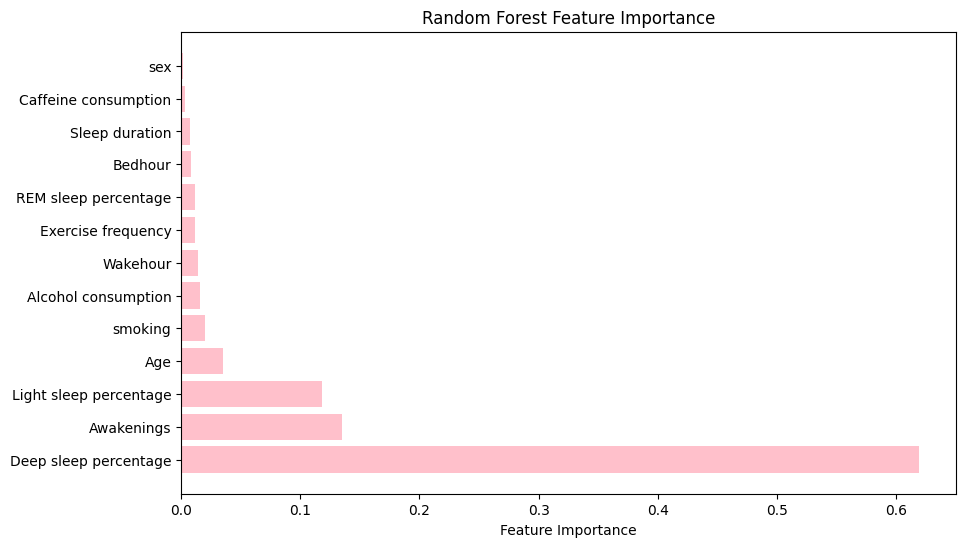

In [ ]:
#VISUALIZE FEATURES WITH MOST IMPACT
import matplotlib.pyplot as plt

feature_importances = best_rf_model.feature_importances_

feature_importance_dict = dict(zip(X_train.columns, feature_importances))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)   # Sort features by importance in descending order
features, importance = zip(*sorted_features)                                                  # Extract feature names and importance scores

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='pink')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

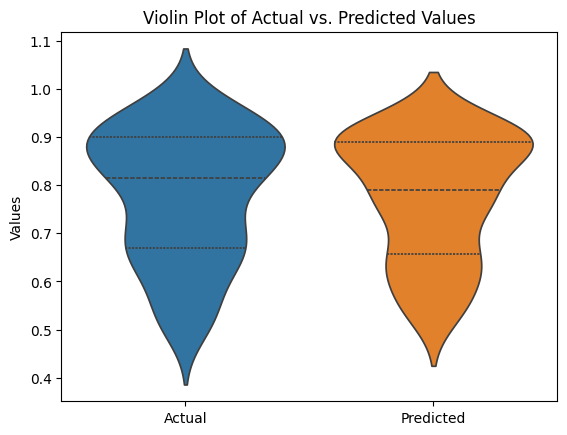

In [ ]:
import seaborn as sns

def validate(Y_test,y_pred):
  # Combine actual and predicted values into a single DataFrame
  df_violin = pd.DataFrame({'Actual': Y_test.values.ravel(), 'Predicted': y_pred})

  # Create a violin plot
  sns.violinplot(data=df_violin, inner="quartile")
  plt.title('Violin Plot of Actual vs. Predicted Values')
  plt.ylabel('Values')
  plt.show()

validate(Y_test,y_pred)

In [ ]:
# Get user input for features
age = int(input("Enter age: "))
sleep_duration = float(input("Enter sleep duration (hours): "))
rem_sleep_percentage = float(input("Enter REM sleep percentage: "))
deep_sleep_percentage = float(input("Enter deep sleep percentage: "))
light_sleep_percentage = float(input("Enter light sleep percentage: "))
awakenings = int(input("Enter number of awakenings: "))
caffeine_consumption = int(input("Enter caffeine consumption (mg): "))
alcohol_consumption = int(input("Enter alcohol consumption (units): "))
exercise_frequency = int(input("Enter exercise frequency (times per week): "))
sex = int(input("Enter sex (1 for Male, 0 for Female): "))
smoking = int(input("Enter smoking status (1 for Yes, 0 for No): "))
bed_hour = int(input("Enter bedtime hour (0-23): "))
wake_hour = int(input("Enter wakeup hour (0-23): "))

# Create feature array
features = [[age, sleep_duration, rem_sleep_percentage, deep_sleep_percentage,
             light_sleep_percentage, awakenings, caffeine_consumption, alcohol_consumption,
             exercise_frequency, sex, smoking, bed_hour, wake_hour]]

# Use the trained Random Forest model to make predictions
predicted_sleep_efficiency = best_rf_model.predict(features)

print("Predicted sleep efficiency:", predicted_sleep_efficiency[0])


Enter age: 21
Enter sleep duration (hours): 8
Enter REM sleep percentage: 30
Enter deep sleep percentage: 30
Enter light sleep percentage: 40
Enter number of awakenings: 0
Enter caffeine consumption (mg): 0
Enter alcohol consumption (units): 0
Enter exercise frequency (times per week): 5
Enter sex (1 for Male, 0 for Female): 0
Enter smoking status (1 for Yes, 0 for No): 0
Enter bedtime hour (0-23): 21
Enter wakeup hour (0-23): 5
Predicted sleep efficiency: 0.828419444444445
